In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [37]:
file_path = 'C:\\Users\\Admin\\Documents/Random0/Datasets/curriculum_dataset_2.xlsx' 
dataset = pd.ExcelFile(file_path)

# 1_skills_frequency

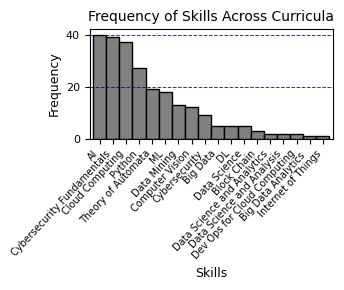

In [39]:
curriculum_data = dataset.parse('Curriculum Data')

all_skills = curriculum_data['Curriculum Skills'].str.split(', ').sum()
skill_counts = pd.Series(all_skills).value_counts()

plt.figure(figsize=(3.5, 3))  
skill_counts.sort_values(ascending=False).plot(
    kind='bar',
    color='gray',
    edgecolor='black',
    width=1.0
)

plt.title('Frequency of Skills Across Curricula', fontsize=10)
plt.xlabel('Skills', fontsize=9)
plt.ylabel('Frequency', fontsize=9)
plt.xticks(rotation=47, ha='right', fontsize=7)
plt.yticks(fontsize=8)

plt.grid(axis='y', linestyle='--', linewidth=0.7, color='navy', alpha=0.8)

plt.tight_layout()

plt.savefig('1_skills_frequency.png', dpi=300)  
plt.show()

# 2_skills_by_region

<Figure size 350x300 with 0 Axes>

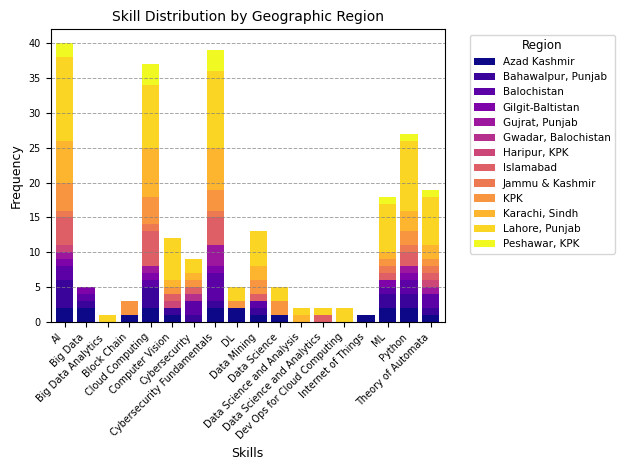

In [41]:
curriculum_data = dataset.parse('Curriculum Data')

curriculum_data['Skills List'] = curriculum_data['Curriculum Skills'].str.split(', ')
region_skills = curriculum_data.explode('Skills List')

region_skill_counts = region_skills.groupby(['Area', 'Skills List']).size().unstack(fill_value=0)

plt.figure(figsize=(3.5, 3)) 
region_skill_counts.T.plot(kind='bar', stacked=True, colormap='plasma', width=0.8)

plt.title('Skill Distribution by Geographic Region', fontsize=10)
plt.xlabel('Skills', fontsize=9)
plt.ylabel('Frequency', fontsize=9)
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.yticks(fontsize=7)

plt.grid(axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=7.5, title_fontsize=8.5)

plt.tight_layout()

plt.savefig('2_skills_by_region.png', dpi=300) 
plt.show()

In [47]:
file_path = 'C:\\Users\\Admin\\Documents/Random0/Datasets/job_posting_dataset.xlsx'  
dataset1 = pd.ExcelFile(file_path)
sheet1 = dataset1.parse('Sheet1')

In [61]:
def generate_summary(data):
    total_jobs = len(data)
    most_common_location = data['Location'].value_counts().idxmax()
    most_common_job_type = data['Job Type'].value_counts().idxmax()
    most_required_skill = pd.Series(data['Job Skills'].dropna().str.split(', ').sum()).value_counts().idxmax()
    most_common_positions = data['Position Name'].value_counts().head(3).index.tolist()
    
    summary = (
        f"The dataset contains {total_jobs} job postings. "
        f"The most common job location is {most_common_location}, with the majority of roles being {most_common_job_type}. "
        f"The most frequently required skill is {most_required_skill}. "
        f"Popular job titles include {', '.join(most_common_positions[:-1])}, and {most_common_positions[-1]}."
    )
    return summary

print(generate_summary(sheet1))

The dataset contains 30 job postings. The most common job location is Lahore, with the majority of roles being Full-time. The most frequently required skill is Python. Popular job titles include DevOps Engineer, Data Scientist, and Penetration Tester.


# 3_job_distribution_by_location

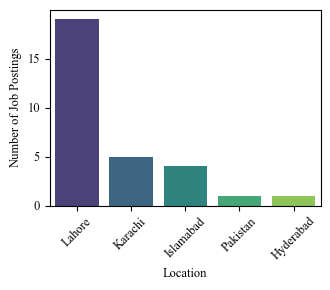

In [49]:
location_distribution = sheet1['Location'].value_counts().reset_index()
location_distribution.columns = ['Location', 'Count']

location_distribution['Hue'] = location_distribution['Location']

plt.figure(figsize=(3.5, 3))  
sns.barplot(
    data=location_distribution, 
    x='Location', 
    y='Count', 
    hue='Hue',  
    dodge=False,  
    palette="viridis"
)

plt.legend([], [], frameon=False)

plt.xlabel("Location", fontsize=9, fontname="Times New Roman")
plt.ylabel("Number of Job Postings", fontsize=9, fontname="Times New Roman")
plt.xticks(rotation=45, fontsize=9, fontname="Times New Roman")
plt.yticks(fontsize=9, fontname="Times New Roman")

plt.tight_layout()
plt.savefig('3_job_distribution_by_location.png', dpi=300)
plt.show()

# 4_skills_wordcloud

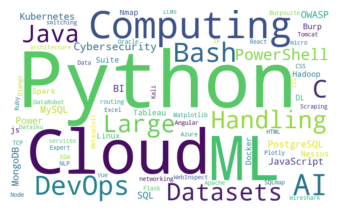

In [51]:
from wordcloud import WordCloud

skills_combined = sheet1['Job Skills'].dropna().str.split(', ').sum()
skills_text = " ".join(skills_combined)

wordcloud = WordCloud(
    width=750, 
    height=450, 
    background_color="white",
    colormap="viridis",
    collocations=False
).generate(skills_text)

plt.figure(figsize=(3.5, 3))  
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.tight_layout()
plt.savefig('4_skills_wordcloud.png', dpi=300)
plt.show()

# 5_job_distribution_by_type

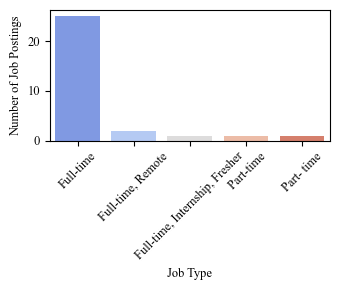

In [53]:
job_type_distribution = sheet1['Job Type'].value_counts().reset_index()
job_type_distribution.columns = ['Job Type', 'Count']

plt.figure(figsize=(3.5, 3))  
sns.barplot(
    data=job_type_distribution,
    x='Job Type',
    y='Count',
    palette="coolwarm",
    hue='Job Type',  
    dodge=False      
)

plt.legend([], [], frameon=False)

plt.xlabel("Job Type", fontsize=9, fontname="Times New Roman")
plt.ylabel("Number of Job Postings", fontsize=9, fontname="Times New Roman")
plt.xticks(rotation=45, fontsize=9, fontname="Times New Roman")
plt.yticks(fontsize=9, fontname="Times New Roman")

plt.tight_layout()
plt.savefig('5_job_distribution_by_type.png', dpi=300)
plt.show()

# 6_salary_distribution

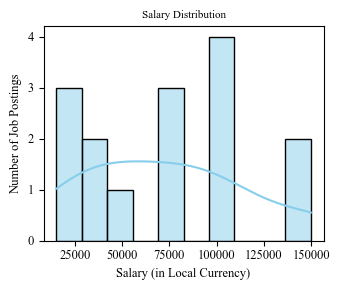

In [57]:
import re
import seaborn as sns

def extract_salary(salary_str):
    numbers = re.findall(r'\d+', salary_str.replace(',', ''))
    if numbers:
        return int(numbers[0])  
    return None

sheet1['Salary_Num'] = sheet1['Salary'].apply(extract_salary)

salary_data = sheet1.dropna(subset=['Salary_Num'])

plt.figure(figsize=(3.5, 3))  
sns.histplot(salary_data['Salary_Num'], bins=10, kde=True, color='skyblue')

plt.title("Salary Distribution", fontsize=8, fontname="Times New Roman")
plt.xlabel("Salary (in Local Currency)", fontsize=9, fontname="Times New Roman")
plt.ylabel("Number of Job Postings", fontsize=9, fontname="Times New Roman")
plt.xticks(fontsize=9, fontname="Times New Roman")
plt.yticks(fontsize=9, fontname="Times New Roman")

plt.tight_layout()
plt.savefig('6_salary_distribution.png', dpi=300)  